<h1 style="text-align: center;">Bank Customer Churn Analysis</h1>

### 1. Introduction

**Objective**:

Analyze customer churn patterns to identify which demographic and financial factors are most associated with clients leaving the bank.

**Dataset**: Bank_Churn.csv

**Tools**: Python, Pandas, Matplotlib, Seaborn

### 2. Data Overview

**Import necessary libraries**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
sns.set(style='whitegrid')
%matplotlib inline

**Establish Theme**

In [22]:
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": "#F8F9FA",
        "grid.color": "#E2E8F0",
        "axes.edgecolor": "#CBD5E0",
        "axes.labelcolor": "#2D3748",
        "text.color": "#2D3748",
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10
    }
)

# Palette: blue for retained, orange for churned
palette_bank = {
    0: "#2B6CB0",  # Retained clients - blue
    1: "#ED8936"   # Churned clients - orange
}

# Set global figure parameters
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


**Load the dataset**

In [23]:
df = pd.read_csv(r"D:\Downloads\Bank_Churn.csv")
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [24]:
df.isnull().sum()


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*No missing values detected — the dataset is clean and ready for analysis.*

**Calculate the average salary of churned vs. non-churned customers**

In [25]:
avg_salary_churned = df[df['Exited'] == 1]['EstimatedSalary'].mean()
avg_salary_not_churned = df[df['Exited'] == 0]['EstimatedSalary'].mean()

avg_salary_churned, avg_salary_not_churned


(101465.6775306824, 99738.39177194514)

**Count the number of customers by number of products**

In [26]:
df['NumOfProducts'].value_counts()


1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

*Most customers have 1 or 2 products.*

**Count the number of customers with zero balance**

In [27]:
num_zero_balance = (df['Balance'] == 0).sum()
num_zero_balance


3617

*A significant number of clients have zero balance, suggesting inactive accounts.*

### 3. Exploratory Analysis

**Clients by Gender**

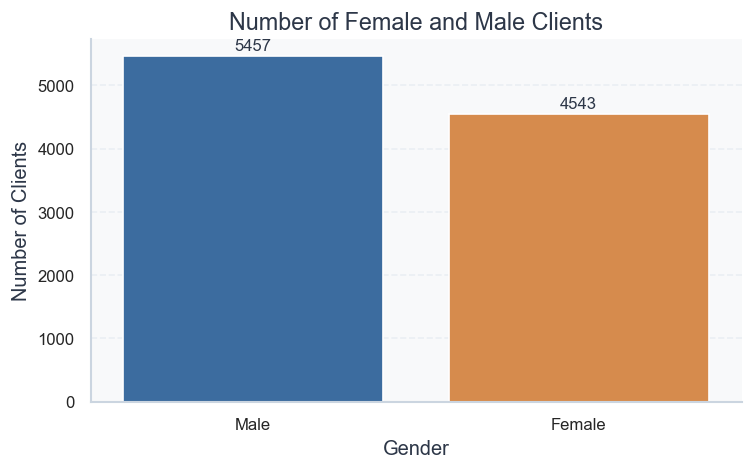

In [28]:
ax = sns.countplot(
    x='Gender',
    data=df,
    order=df['Gender'].value_counts().index,
    palette=['#2B6CB0', '#ED8936']
)
plt.title('Number of Female and Male Clients', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.show()


*Bank's customer base is balanced, so gender alone is not likely a primary churn factor.*

**Number of Clients by Country**

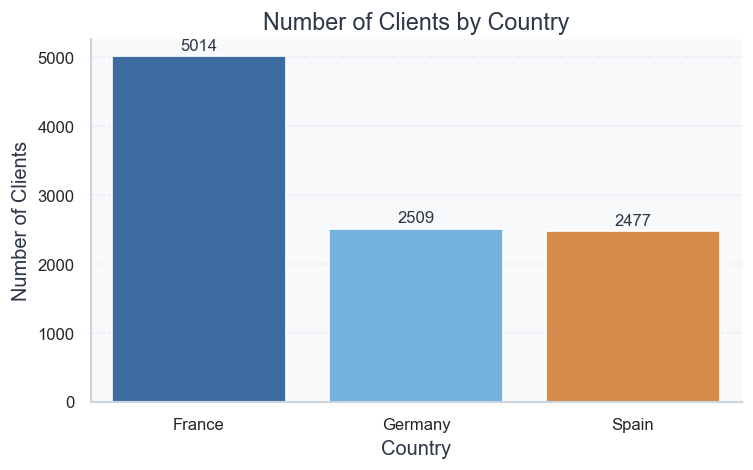

In [29]:
ax = sns.countplot(
    x='Geography',
    data=df,
    order=df['Geography'].value_counts().index,
    palette=['#2B6CB0', '#63B3ED', '#ED8936']
)
plt.title('Number of Clients by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.show()


*France has the largest customer base, followed by Germany and Spain.*

### 4. Churn Patterns

**Credit Score Distributions for Churned vs. Retained Customers**

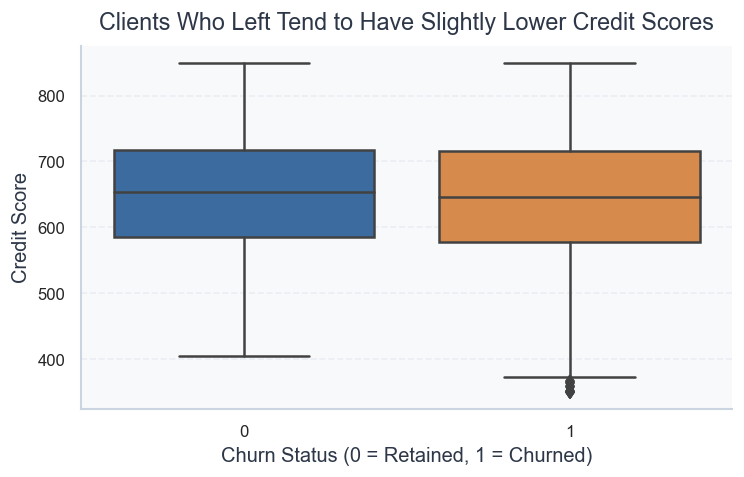

In [30]:
sns.boxplot(
    x='Exited',
    y='CreditScore',
    data=df,
    palette={0: '#2B6CB0', 1: '#ED8936'}
)
plt.title('Clients Who Left Tend to Have Slightly Lower Credit Scores', fontsize=14, pad=10)
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Credit Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

*Churned customers tend to have slightly lower credit scores.*

**Churned vs Retained Customers**

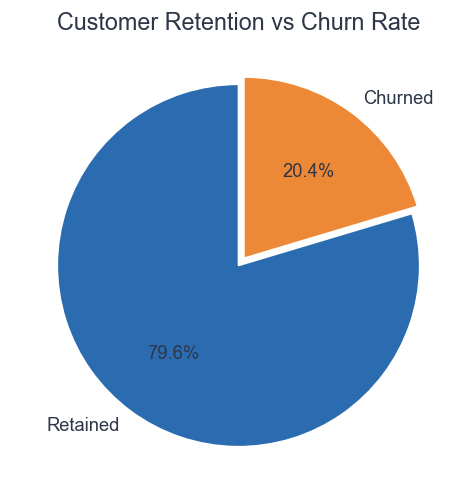

In [31]:
counts = df['Exited'].value_counts()
labels = ['Retained', 'Churned']
colors = ['#2B6CB0', '#ED8936']

plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0, 0.05],
    shadow=False,
    textprops={'fontsize': 11}
)
plt.title('Customer Retention vs Churn Rate', fontsize=14)
plt.show()


*The pie chart shows that:*

- *The majority of customers stayed with the bank,*

- *while a smaller proportion churned (typically around 20%).*


**Churned vs Retained Customers By Gender**

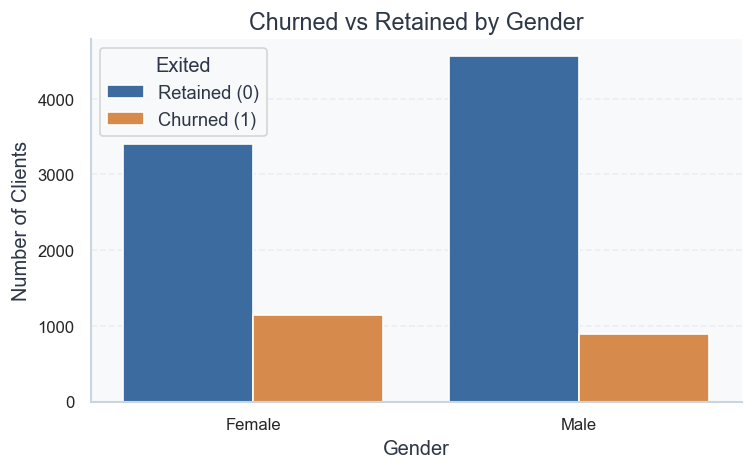

In [32]:
sns.countplot(
    x='Gender',
    hue='Exited',
    data=df,
    palette={0: '#2B6CB0', 1: '#ED8936'}
)
plt.title('Churned vs Retained by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Exited', labels=['Retained (0)', 'Churned (1)'])
plt.show()


*Females show a slightly higher churn rate.*

### 5. Customer Segmentation & Behavioral Analysis

**Churn Rate by Geography**

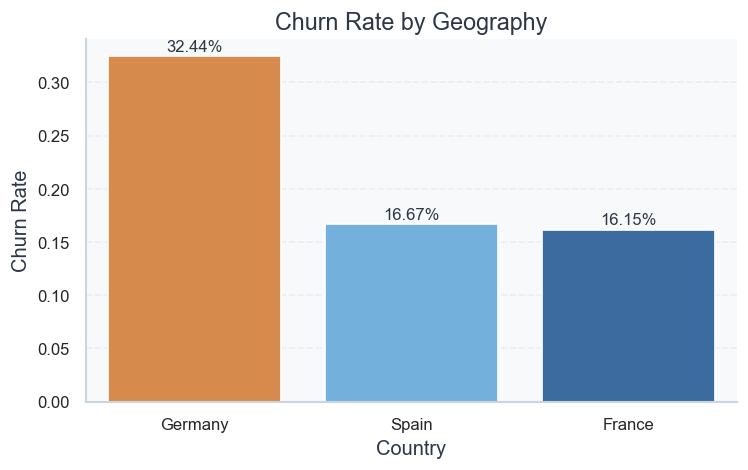

In [33]:
churn_by_geo = df.groupby('Geography')['Exited'].mean().sort_values(ascending=False).reset_index()

sns.barplot(
    x='Geography',
    y='Exited',
    data=churn_by_geo,
    palette=['#ED8936', '#63B3ED', '#2B6CB0']
)
plt.title('Churn Rate by Geography', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(churn_by_geo['Exited']):
    plt.text(index, value + 0.005, f'{value:.2%}', ha='center', fontsize=10)

plt.show()


*Germany typically shows the highest churn rate.*

**Churn Rate for Customers with CreditScore < 600**

In [34]:
low_credit_churn_rate = df[df['CreditScore'] < 600]['Exited'].mean()
print(f"Churn rate for customers with CreditScore < 600: {low_credit_churn_rate:.2%}")

Churn rate for customers with CreditScore < 600: 21.75%


*Customers with lower credit scores churn more often.*

**Create New Column: AgeGroup**

In [35]:
def categorize_age(age):
    if age < 30:
        return 'young'
    elif 30 <= age <= 49:
        return 'middle-aged'
    else:
        return 'senior'

df['AgeGroup'] = df['Age'].apply(categorize_age)
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,42,middle-aged
1,41,middle-aged
2,42,middle-aged
3,39,middle-aged
4,43,middle-aged


**Find Age Group with Highest Churn**

AgeGroup
senior         0.454480
middle-aged    0.183659
young          0.075564
Name: Exited, dtype: float64


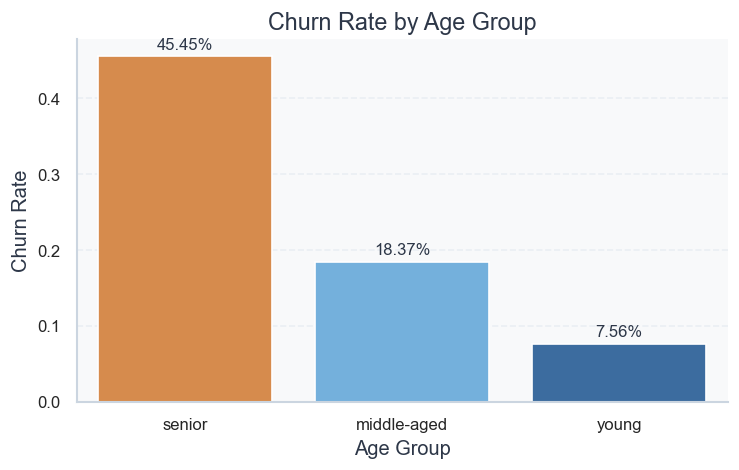

In [36]:
churn_by_agegroup = df.groupby('AgeGroup')['Exited'].mean().sort_values(ascending=False)
print(churn_by_agegroup)

sns.barplot(
    x=churn_by_agegroup.index,
    y=churn_by_agegroup.values,
    palette=['#ED8936', '#63B3ED', '#2B6CB0']  # naranja → azul claro → azul oscuro
)
plt.title('Churn Rate by Age Group', fontsize=14)
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(churn_by_agegroup.values):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', fontsize=10)

plt.show()


*Senior clients often have the highest churn rate.*

**Compare Active vs Inactive Members**

                     Balance  EstimatedSalary
IsActiveMember                               
0               77134.376863    100767.203854
1               75875.422145     99452.965894


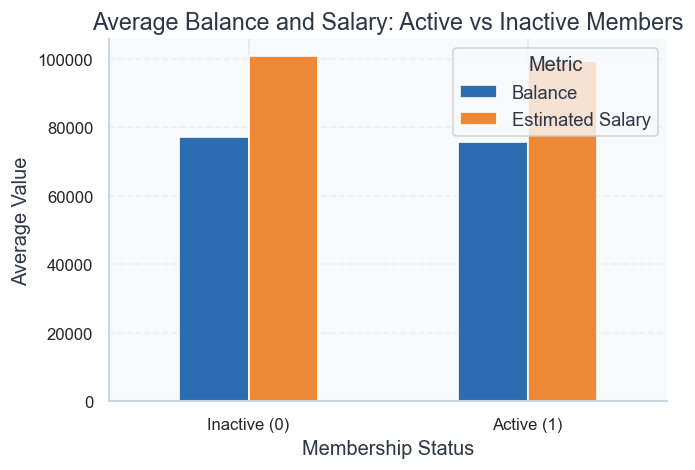

In [37]:
comparison = df.groupby('IsActiveMember')[['Balance', 'EstimatedSalary']].mean()
print(comparison)

# Visualization
comparison.plot(
    kind='bar',
    figsize=(6,4),
    color=['#2B6CB0', '#ED8936']  # azul = balance, naranja = salary
)
plt.title('Average Balance and Salary: Active vs Inactive Members', fontsize=14)
plt.ylabel('Average Value')
plt.xlabel('Membership Status')
plt.xticks([0,1], ['Inactive (0)', 'Active (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Metric', labels=['Balance', 'Estimated Salary'])
plt.show()

*Active members usually maintain higher balances.*

### 6. Predictive Modeling (Machine Learning)

In [44]:
df = df.drop(["CustomerId", "Surname"], axis=1)  #Data Preprocessing
df = pd.get_dummies(df, drop_first=True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,AgeGroup_senior,AgeGroup_young
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0


In [49]:
X = df.drop("Exited", axis=1)  #Train-Test Split
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LogisticRegression(max_iter=1000)  #Logistic Regression Model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1572   35]
 [ 365   28]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.44      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.52      0.50      2000
weighted avg       0.74      0.80      0.74      2000



In [47]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)  #Random Forest Model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1551   56]
 [ 202  191]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



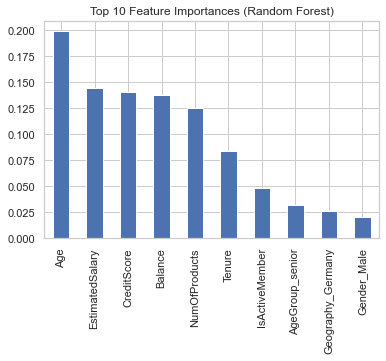

In [48]:
importances = pd.Series(rf.feature_importances_, index=X.columns)   #Model Evaluation & Interpretation
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

### 7. Key Insights & Recommendations

### Key Insights

1. **Geographical Differences:**  
   - **Germany** has the highest churn rate (~32%), almost double that of Spain (17%) and France (16%).  
   - This suggests stronger competition or lower satisfaction among German clients.

2. **Credit Score Influence:**  
   - Clients with **CreditScore < 600** show a churn rate of **~21.7%**, higher than the overall average (~20%).  
   - Lower creditworthiness is associated with higher churn probability.

3. **Age Group Patterns:**  
   - **Senior customers (50+)** have the **highest churn rate (~45%)**, followed by middle-aged clients (~18%).  
   - Younger customers (<30) show much stronger retention (~7%).

4. **Customer Activity:**  
   - **Inactive members** hold slightly higher average balances but show **lower engagement**.  
   - These clients represent a **silent churn risk** due to low product usage.

5. **Demographic and Product Mix:**  
   - The customer base is balanced by gender, though females churn slightly more.  
   - Most clients hold **1–2 products**, while a notable segment (~3,600) maintains **zero balances**, suggesting underutilization of services.

---

### Recommendations

1. **Target High-Risk Segments**
   - Focus retention actions on **senior and German clients**, who have the highest churn rates.  
   - Offer tailored financial products or loyalty programs for these groups.

2. **Re-Engage Inactive Clients**
   - Launch **re-engagement campaigns** (emails, app notifications, or advisor outreach).  
   - Use incentives like **cashback**, **interest bonuses**, or **personalized offers**.

3. **Credit-Based Retention Strategy**
   - Provide **credit counseling** and **improvement programs** for low-score clients (<600).  
   - Educate customers on the link between credit health and financial benefits.

4. **Regional and Demographic Customization**
   - Investigate **Germany’s churn drivers** via customer feedback.  
   - Adjust marketing tone and benefits by **age group** and **region**.

5. **Predictive Monitoring**
   - Implement a **machine learning churn model** to flag high-risk customers early.  
   - Track churn monthly as a **key performance indicator (KPI)** and combine it with balance growth and engagement metrics.

---

### Summary of High-Risk Segments

| Segment                     | Churn Rate | Key Action |
|------------------------------|-------------|-------------|
| Germany                      | 32.4%       | Regional retention campaign |
| CreditScore < 600            | 21.7%       | Credit advisory & support |
| Senior (50+)                 | 45.4%       | Loyalty and retention focus |
| Inactive Members             | —           | Reactivation strategy |
| Zero Balance Accounts        | —           | Encourage product use |

